# DATA A6 : 	MRTSSM4453USN  
Data : Retail Sales: Beer, Wine, and Liquor Stores
Period : From Janvier 1994 to Décembre 2019
Frequency: Monthly


In [173]:
import pandas as pd
from statsmodels.tsa.tsatools import detrend
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import acf

In [174]:
#importation des données /chargement du fichier
A6= pd.read_csv('A6.csv',index_col=0)

In [175]:
#affichage des 5 premiers lignes
A6.head(5)

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [176]:
#affichage des 3 derniers lignes
A6.tail(3)

,MRTSSM4453USN
DATE,
2021-12-01,7701
2022-01-01,4939
2022-02-01,5054


In [177]:
#decouverte des données
str(A6)

'            MRTSSM4453USN\nDATE                     \n1992-01-01           1509\n1992-02-01           1541\n1992-03-01           1597\n1992-04-01           1675\n1992-05-01           1822\n...                   ...\n2021-10-01           5761\n2021-11-01           6021\n2021-12-01           7701\n2022-01-01           4939\n2022-02-01           5054\n\n[362 rows x 1 columns]'

In [178]:
# vérifions 
print(type(A6))

<class 'pandas.core.frame.DataFrame'>


In [179]:
#dimensions : nombre de lignes, nombre de colonnes
print(A6.shape)

(362, 1)


In [180]:
#Les noms des colonnes
print(data.columns)

Index(['MRTSSM4453USN'], dtype='object')


In [181]:
# pour renommer sous le nom SALES . 
A6.rename(columns = {'MRTSSM4453USN': 'SALES'})

,SALES
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2021-10-01,5761
2021-11-01,6021
2021-12-01,7701


# la saisonnalité : existence et périodicité¶
La Saisonnalité est, dans les données de séries chronologiques, la présence de variations qui se produisent à des intervalles de temps réguliers spécifiques, tels que hebdomadaires, mensuels ou trimestriels.

<AxesSubplot:xlabel='DATE'>

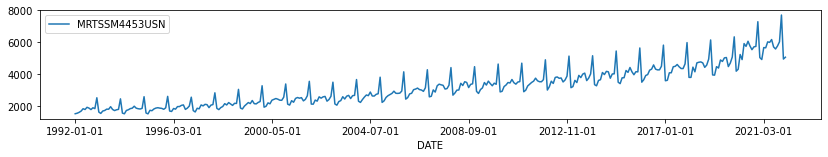

In [188]:
A6.plot(figsize=(14,2))

<AxesSubplot:xlabel='DATE'>

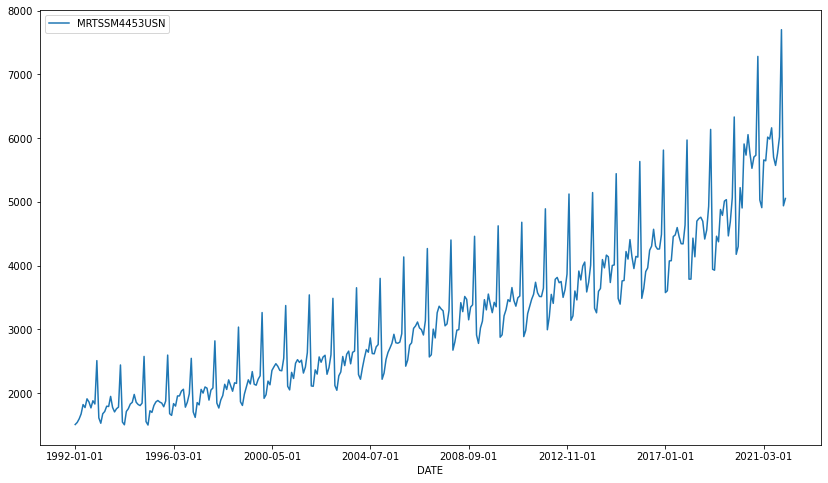

In [193]:
A6.plot(figsize=(14,8))

<AxesSubplot:xlabel='DATE'>

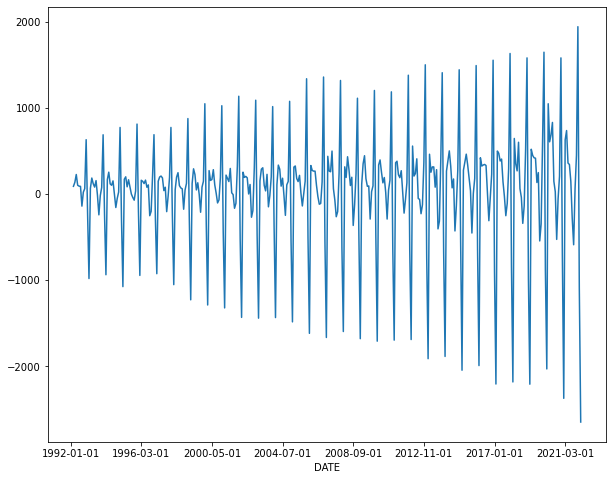

In [195]:
A6.MRTSSM4453USN.diff(2).plot(figsize=(10, 8))

In [196]:
 #On vérifie pour la période.
from statsmodels.tsa.stattools import acf
cor = acf(A6.MRTSSM4453USN)
cor

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.8629161 , 0.83329485, 0.82522978, 0.82248972,
       0.84017516, 0.81419656, 0.82167789, 0.78394853, 0.76626872,
       0.74518678, 0.76114786, 0.87516831, 0.74492129, 0.71573403,
       0.70660098, 0.7052645 , 0.72020318, 0.69362714, 0.69962206,
       0.6626154 , 0.6440549 , 0.62398586, 0.64106112, 0.74904983,
       0.62744852, 0.60059865, 0.59551297, 0.59742618, 0.61401268,
       0.59312402, 0.60153679, 0.57163688, 0.55506875, 0.54246533,
       0.5591921 , 0.66498582, 0.54959151, 0.52281546, 0.51890631,
       0.51884013])

# Tendance¶
La tendance est une structure décrivant la hausse ou la baisse à long terme d'une variable numérique.


In [197]:
from statsmodels.api import OLS
import numpy
y = A6.MRTSSM4453USN
X = numpy.ones((len(y), 2))
X[:,1] = numpy.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    1303.446464
x1         10.490969
dtype: float64

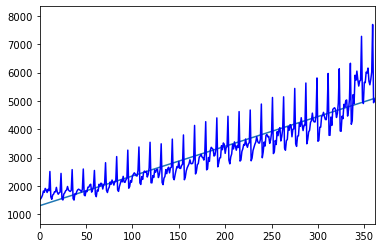

In [198]:
from statsmodels.graphics.regressionplots import abline_plot
fig = abline_plot(model_results=results)
ax = fig.axes[0]
ax.plot(X[:,1], y, 'b')
ax.margins(.1)

# Prédictions linéaires¶
On sort ici du cadre linéaire pour utiliser le machine learning non linéaire pour faire de la prédiction. Pour éviter les trop gros problèmes de tendance, on travaillera sur la série différenciée. En théorie, il faudrait différencier jusqu’à ce qu’on enlève la tendance


In [199]:
A6["diff"] = numpy.nan
A6.loc[1:, "diff"] = (A6.iloc[1:, 1].values - A6.iloc[:len(A6)-1, 1].values)
pd.concat([A6.head(n=3), A6.tail(n=5)])

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,MRTSSM4453USN,diff
DATE,,
1992-01-01,1509,NaN
1992-02-01,1541,NaN
1992-03-01,1597,NaN
2021-10-01,5761,NaN
2021-11-01,6021,NaN
2021-12-01,7701,NaN
2022-01-01,4939,NaN
2022-02-01,5054,NaN


# Auto-corrélation¶

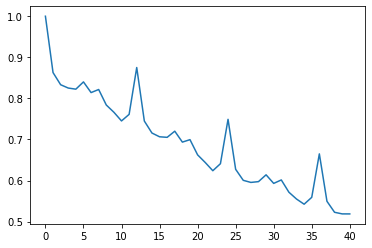

In [202]:
plt.plot(cor)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


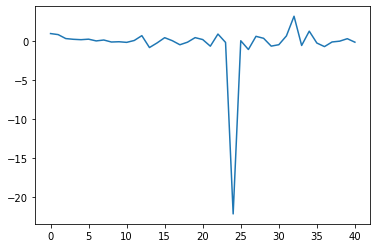

In [203]:
from statsmodels.tsa.stattools import pacf
pcor = pacf(A6.MRTSSM4453USN)
plt.plot(pcor)

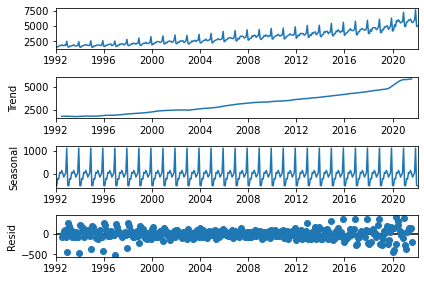

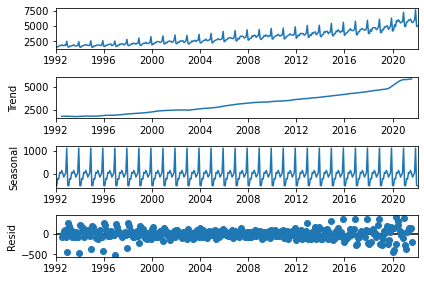

In [221]:

from statsmodels.tsa.seasonal import seasonal_decompose
  
result = seasonal_decompose(A6)
  
result.plot()

# ARIMA: 
Modèle ARIMA pour la prévision de séries temporelles
ARIMA signifie modèle de moyenne mobile intégré autorégressif et est spécifié par trois paramètres d’ordre: (p, d, q).

In [225]:
pip install pmdarima

In [228]:

  
from pmdarima import auto_arima
  
import warnings
warnings.filterwarnings("ignore")
  
stepwise_fit = auto_arima(A6, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4234.874, Time=2.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4402.827, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4280.684, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4246.870, Time=0.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4268.870, Time=0.17 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4231.252, Time=0.83 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4249.866, Time=0.61 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=4229.104, Time=4.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4243.441, Time=0.81 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=10.07 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=4231.874, Time=3.86 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4237.394, Time=2.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=4252.968, Time=2.46 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=4211.667, Time=3.44 sec
 ARIMA(2,1,1)(1,1,1)[12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  362
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2099.704
Date:                              Fri, 13 May 2022   AIC                           4209.408
Time:                                      13:41:48   BIC                           4228.683
Sample:                                           0   HQIC                          4217.081
                                              - 362                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7166      0.041    -17.394      0.000      -0.797      -0.636
ar.L2         -0.3135      0.043     -7.248      0.000      -0.398      -0.229
ar.L3          0.1201      0.038      3.155      0.002       0.045       0.195
ma.S.L12      -0.4223      0.042    -10.008      0.000      -0.505      -0.340
sigma2      9749.3473    529.277     18.420      0.000    8711.984    1.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               121.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [234]:
train = A6.iloc[:len(A6)-12]
test = A6.iloc[len(A6)-12:]
  
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train, 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      MRTSSM4453USN   No. Observations:                  350
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2017.399
Date:                            Fri, 13 May 2022   AIC                           4044.797
Time:                                    13:52:29   BIC                           4063.898
Sample:                                01-01-1992   HQIC                          4052.411
                                     - 02-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5756      0.031    -18.871      0.000      -0.635      -0.516
ar.S.L12       0.3121      0.165      1.886      0.059      -0.012       0.636
ar.S.L24      -0.1954      0.086     -2.262      0.024      -0.365      -0.026
ma.S.L12      -0.5421      0.177     -3.057      0.002      -0.890      -0.195
sigma2      9161.8662    500.362     18.310      0.000    8181.174    1.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.03   Jarque-Bera (JB):               423.27
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.71   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='DATE'>

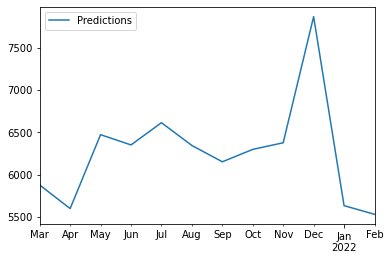

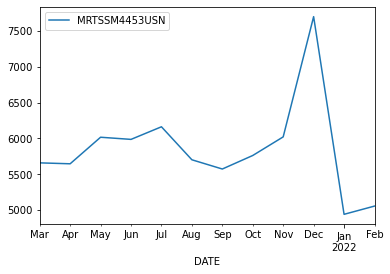

In [247]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
predictions.plot(legend = True)
test.plot(legend = True)

In [253]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
mean_squared_error(test, predictions)
  

206964.16238151703

<AxesSubplot:xlabel='DATE'>

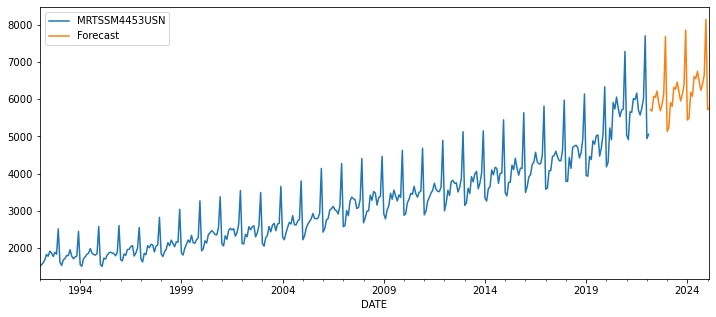

In [255]:
model = model = SARIMAX(A6, 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
forecast = result.predict(start = len(A6), 
                          end = (len(A6)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
A6.plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [ ]:
    En ce qui concerne le bruit , 
    p-value < 0.05 donc les résidus sont stationnaire

#p-value > 0.05 donc les résidus sont assimilables à un bruit blanc
